## Applied Signal and Image Processing

(Subhashish Nabajja, CS24010)

**Aim**:Write the program to extract image features by implementing methods like corner and blob detectors, HoG and Haar features.



## Feature Extraction from Images

### Introduction
Feature extraction is a fundamental step in computer vision and image processing, used to identify important aspects of an image that can be used for tasks like object detection, image classification, and tracking. This implementation covers methods like **corner detection**, **blob detection**, **Histogram of Oriented Gradients (HoG)**, and **Haar features**.

---

### Feature Extraction Methods

1. **Corner Detection (Harris Corner Detector)**:
   - Identifies points of interest where the image intensity changes sharply in two directions.
   - Useful for applications like image stitching and object recognition.

2. **Blob Detection**:
   - Detects regions in the image that differ in brightness or color compared to the surrounding area.
   - Used in tasks such as feature matching and segmentation.

3. **Histogram of Oriented Gradients (HoG)**:
   - Describes the local distribution of gradients in an image.
   - Commonly used in object detection, especially for detecting pedestrians.

4. **Haar Features**:
   - Rectangular features used to capture edge or texture information.
   - Frequently applied in face detection and object recognition.

---

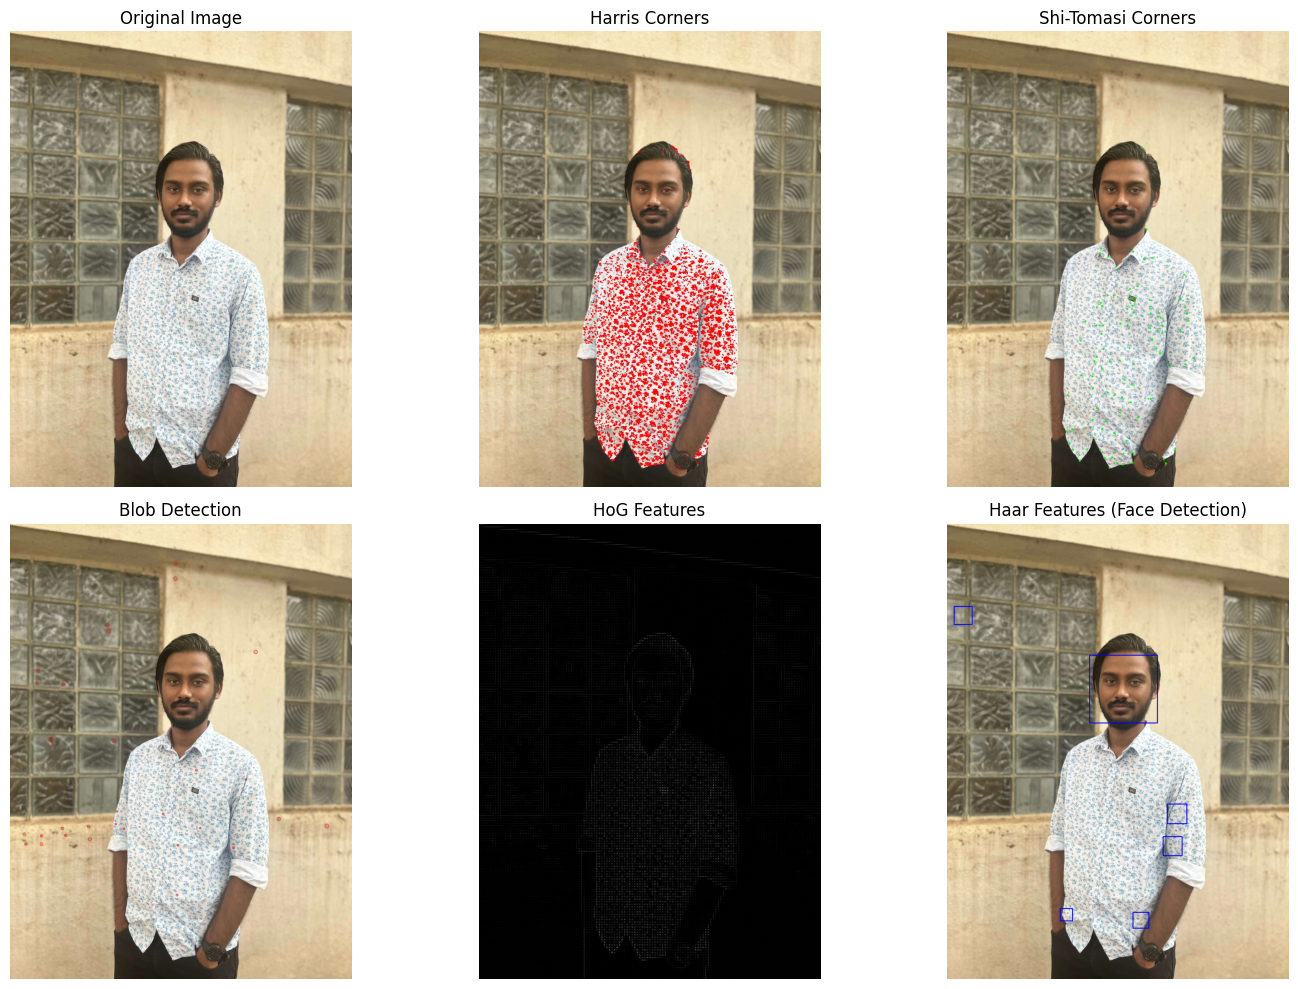

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

def feature_extraction(image_path): 
    # Load the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 1. Corner Detection (Harris)
    harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    harris_corners = cv2.dilate(harris_corners, None) # Enhance corner points
    img_harris = img.copy()
    img_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

#2. Corner Detection (Shi-Tomasi)
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01,minDistance=10)
    corners = np.int32(corners)
    img_shi_tomasi = img.copy()
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(img_shi_tomasi, (x, y), 3, (0, 255, 0), -1)

# 3. Blob Detection
    blob_params = cv2.SimpleBlobDetector_Params()
    blob_detector = cv2.SimpleBlobDetector_create(blob_params)
    keypoints = blob_detector.detect(gray)
    img_blob = cv2.drawKeypoints(img, keypoints, None, (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 4. HoG Features
    hog_features, hog_image = hog(gray, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
    visualize=True, block_norm='L2-Hys')

# 5. Haar Features (Face Detection)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5,
    minSize=(30, 30))
    img_haar = img.copy()
    for (x, y, w, h) in faces:
        cv2.rectangle(img_haar, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Plot the results
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    plt.title("Original Image")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 2)
    plt.title("Harris Corners")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 3)
    plt.title("Shi-Tomasi Corners")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_shi_tomasi, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 4)
    plt.title("Blob Detection")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_blob, cv2.COLOR_BGR2RGB))

    plt.subplot(2, 3, 5)
    plt.title("HoG Features")
    plt.axis('off')
    plt.imshow(hog_image, cmap='gray')

    plt.subplot(2, 3, 6)
    plt.title("Haar Features (Face Detection)")
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img_haar, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()

# Path to the image
image_path = './assets/me.jpg' # Replace with the path to your image
feature_extraction(image_path)
